In [181]:
# Gerekli kütüphanelerin yüklenmesi

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import normaltest  # D'Agostino K² Testi
from scipy.stats import boxcox
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, r2_score

In [182]:
# Veri setinin yüklenmesi

df = pd.read_csv("titanic_train.csv")

In [183]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [184]:
# veri setinin boyutunu inceleyelim

df.shape

(891, 12)

In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


- Verimiz 891 gözlem ve 12 değişkenden oluşuyor.
- 2 float64, 5 int64, 5 object tipinde değişkenlerimiz bulunmaktadır.
- Eksik değerler bulunmaktadır.


In [186]:
# MISSING VALUE

df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**MISSING VALUE:**

- Age (float64) = 177 eksik değer
- Cabin (object) = 687 eksik değer
- Embarked (object) = 2 eksik değer

olduğunu gözlemliyoruz.

In [187]:
# Age sütunundaki eksik değerleri dolduralım   -   Eksik değerleri doldurma (Yaş sütunu için ortalama kullanıldı)
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [188]:
df["Age"].isnull().any()

False

### CATEGORICAL DEĞERLERİ NUMERICAL DEĞERLERE DÖNÜŞTÜRME  

In [189]:
cols = df.columns

for col in cols:
    print(df[col].value_counts())
    print("---------------------------------------")
    

1      1
599    1
588    1
589    1
590    1
      ..
301    1
302    1
303    1
304    1
891    1
Name: PassengerId, Length: 891, dtype: int64
---------------------------------------
0    549
1    342
Name: Survived, dtype: int64
---------------------------------------
3    491
1    216
2    184
Name: Pclass, dtype: int64
---------------------------------------
Braund, Mr. Owen Harris                     1
Boulos, Mr. Hanna                           1
Frolicher-Stehli, Mr. Maxmillian            1
Gilinski, Mr. Eliezer                       1
Murdlin, Mr. Joseph                         1
                                           ..
Kelly, Miss. Anna Katherine "Annie Kate"    1
McCoy, Mr. Bernard                          1
Johnson, Mr. William Cahoone Jr             1
Keane, Miss. Nora A                         1
Dooley, Mr. Patrick                         1
Name: Name, Length: 891, dtype: int64
---------------------------------------
male      577
female    314
Name: Sex, dtype: int64

In [190]:
# Kategorik değişkenleri sayısal hale getirme   -     Sex ve Embarked değişkenlerini dönüştürelim


df = pd.get_dummies(df, columns=['Sex', 'Embarked'], prefix=['Sex', 'Embarked'], drop_first=True)

In [191]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.000000,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.000000,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.000000,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.000000,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.000000,0,0,373450,8.0500,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.000000,0,0,211536,13.0000,NaN,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.000000,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",29.699118,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.000000,0,0,111369,30.0000,C148,1,0,0


### CORRELATION MAP 

In [192]:
df.corr()["Survived"].sort_values(ascending=False)

C:\Users\Admin\AppData\Local\Temp\ipykernel_5236\1509721473.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()["Survived"].sort_values(ascending=False)


Survived       1.000000
Fare           0.257307
Parch          0.081629
Embarked_Q     0.003650
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.069809
Embarked_S    -0.155660
Pclass        -0.338481
Sex_male      -0.543351
Name: Survived, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_5236\3548077051.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  np.round(df.corr(), 1),


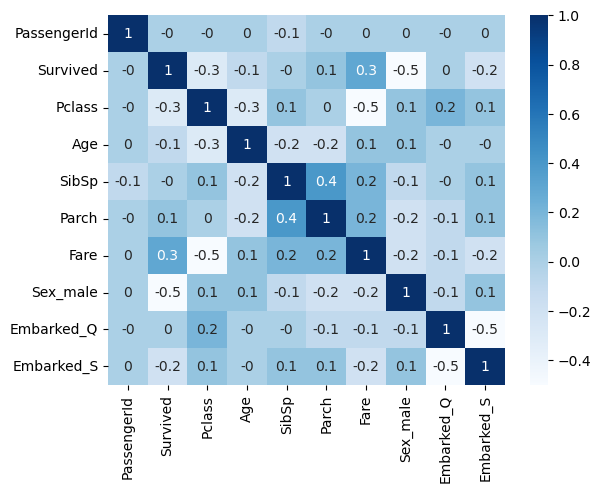

In [193]:
plt.figure(dpi=100)
sns.heatmap(
    np.round(df.corr(), 1),
    annot=True,
    cmap='Blues'
)
plt.show()

In [194]:
# D'Agostino K² testi uygulama
stat, p = normaltest(df['Age'])
print(f"D'Agostino K² Testi Sonucu: p-değeri = {p}")

# p < 0.5 ise başarılı kabul et, aksi takdirde başarısız
if p < 0.5:
    print("Veri başarılı, Standardization (Z-Score) uygulanıyor.")
    scaler = StandardScaler()  # Başarılıysa Standardization (Z-Score)
else:
    print("Veri başarısız, Min-Max Scaling uygulanıyor.")
    scaler = MinMaxScaler()  # Başarısızsa Min-Max Scaling

D'Agostino K² Testi Sonucu: p-değeri = 2.9932746976104566e-10
Veri başarılı, Standardization (Z-Score) uygulanıyor.


In [195]:
# Seçilen ölçekleme yöntemini uygula  --   D'Agostino K² testi uygulama'sı seçilmiştir.
df['Age_Scaled'] = scaler.fit_transform(df[['Age']])

### Alternatif Dönüşümler

1. Box-Cox Dönüşümü:

- Amaç: Veriyi normal dağılıma daha yakın hale getirmek.
- Şart: Tüm değerler pozitif olmalı. (Negatif veya sıfır varsa dönüşüm uygulanamaz.)
- lambda parametresi veriye göre otomatik hesaplanır.

2. Log Dönüşümü:
- Amaç: Büyük ölçekli değerleri küçültmek ve dağılımı simetrik hale getirmek.
- Şart: Negatif veya sıfır değerler olmamalı.

3. Square Root (Karekök) Dönüşümü:
- Amaç: Sağ tarafa çarpık (right-skewed) veriyi daha dengeli hale getirmek.
- Şart: Negatif değerler olmamalı, sıfır kabul edilir.

In [196]:
# 1. Box-Cox Dönüşümü (Sadece pozitif değerler için çalışır)
if (df['Age'] > 0).all():  # Negatif veya sıfır değerleri kontrol et
    df['Age_BoxCox'], lambda_val = boxcox(df['Age'])  # lambda dönüşüm parametresi
    print(f"Box-Cox dönüşümü uygulandı (lambda = {lambda_val})")
else:
    df['Age_BoxCox'] = df['Age']  # Negatif değerler varsa dönüşüm uygulanmaz
    print("Box-Cox uygulanamadı: Negatif veya sıfır değerler içeriyor.")

# 2. Log Dönüşümü (Negatif veya sıfır değerler varsa uygulanmaz)
if (df['Age'] > 0).all():
    df['Age_Log'] = np.log(df['Age'])
    print("Log dönüşümü uygulandı.")
else:
    df['Age_Log'] = df['Age']  # Negatif değerler varsa dönüşüm uygulanmaz
    print("Log dönüşümü uygulanamadı: Negatif veya sıfır değerler içeriyor.")

# 3. Square Root (Karekök) Dönüşümü (Negatif değerler olmamalı)
if (df['Age'] >= 0).all():
    df['Age_Sqrt'] = np.sqrt(df['Age'])
    print("Square Root (Karekök) dönüşümü uygulandı.")
else:
    df['Age_Sqrt'] = df['Age']  # Negatif değerler varsa dönüşüm uygulanmaz
    print("Square Root dönüşümü uygulanamadı: Negatif değerler içeriyor.")

# Dönüştürülmüş veriyi göster
df[['Age', 'Age_Scaled', 'Age_BoxCox', 'Age_Log', 'Age_Sqrt']].head()

Box-Cox dönüşümü uygulandı (lambda = 0.8229818246208759)
Log dönüşümü uygulandı.
Square Root (Karekök) dönüşümü uygulandı.


,Age,Age_Scaled,Age_BoxCox,Age_Log,Age_Sqrt
0,22.0,-0.592481,14.251662,3.091042,4.690416
1,38.0,0.638789,23.036649,3.637586,6.164414
2,26.0,-0.284663,16.531177,3.258097,5.099020
3,35.0,0.407926,21.449592,3.555348,5.916080
4,35.0,0.407926,21.449592,3.555348,5.916080


In [197]:
# Simple Linear Regression için bağımsız ve bağımlı değişkenler -  Örnek olarak:  Age - Survived arasındaki ilişkiyi inceleyelim

X = df[['Age_Scaled']]  # Standardize edilmiş veya Min-Max ölçeklenmiş 'Age' kullanılıyor
y = df['Survived']

In [198]:
# Veriyi eğitim ve test setlerine ayırma

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [199]:
# Model eğitimi

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [200]:
# Tahminleme

y_pred = model.predict(X_test)

In [201]:
# Model performansı değerlendirme

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'MAE: {mae:.2f}, R^2 Score: {r2:.2f}')

MAE: 0.47, R^2 Score: 0.01


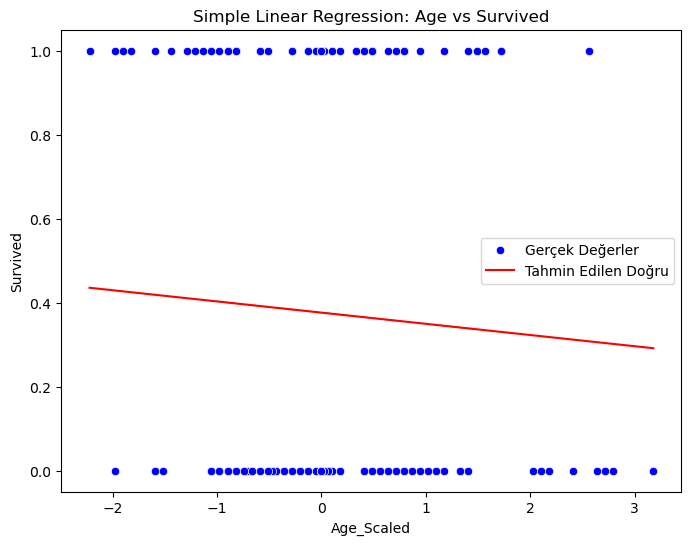

In [202]:
# Regresyon doğrusu çizimi
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test['Age_Scaled'], y=y_test, color='blue', label='Gerçek Değerler')
sns.lineplot(x=X_test['Age_Scaled'], y=y_pred, color='red', label='Tahmin Edilen Doğru')
plt.xlabel('Age_Scaled')
plt.ylabel('Survived')
plt.title('Simple Linear Regression: Age vs Survived')
plt.legend()
plt.show()